<a href="https://colab.research.google.com/github/SarmenSinanian/First-Algo-Attempt/blob/master/Sarmen_Sinanian_applied_modeling_ProjectV3(First_Algo_Attempt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Plot the distribution of your target. 
    - Regression problem: Is your target skewed? Then, log-transform it.
    - Classification: Are your classes imbalanced? Then, don't use just accuracy. And try `class_balance` parameter in scikit-learn.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Share at least 1 visualization on Slack.

You need to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

### Today
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)


### Yesterday
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)






In [1]:
# conda install -c conda-forge category_encoders
# conda update -n base -c defaults conda
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# BELOW DATASET FROM https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=728294400&period2=1566889200&interval=1d&events=history&crumb=ixT1ci5YI3E

In [0]:
# Setting specific columns to use (using unadjusted close and not
#  accounting for the splits and dividends)
columns = ['Date','Close','Volume']

# Calling data set (from github)
spy = pd.read_csv('https://raw.githubusercontent.com/SarmenSinanian/DS-Unit-2-Applied-Modeling/master/SPY.csv',
                   usecols = columns)

# # Calling data set (locally)
# spy = pd.read_csv(r'E:\Desktop\Lambda_School\Assignments\Unit 2 Sprint 7 PROJECT\SPY.csv',
#                   usecols = columns)

In [0]:
spy['Date_String'] = spy['Date']

In [5]:
# Checking columns
spy.head()

,Date,Close,Volume,Date_String
0,1993-01-29,43.93750,1003200,1993-01-29
1,1993-02-01,44.25000,480500,1993-02-01
2,1993-02-02,44.34375,201300,1993-02-02
3,1993-02-03,44.81250,529400,1993-02-03
4,1993-02-04,45.00000,531500,1993-02-04


In [6]:
spy.describe()

,Close,Volume
count,6692.000000,6.692000e+03
mean,134.816022,8.431367e+07
std,60.702370,9.810203e+07
min,43.406250,5.200000e+03
25%,97.203125,7.017450e+06
50%,124.729999,5.707685e+07
75%,152.867501,1.226404e+08
max,302.010010,8.710263e+08


In [7]:
spy.shape

(6692, 4)

In [8]:
spy.isna().sum()

Date           0
Close          0
Volume         0
Date_String    0
dtype: int64

In [0]:
# Changing Dat to datetime format
spy['Date'] = pd.to_datetime(spy['Date'])

In [10]:
spy.dtypes

Date           datetime64[ns]
Close                 float64
Volume                  int64
Date_String            object
dtype: object

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


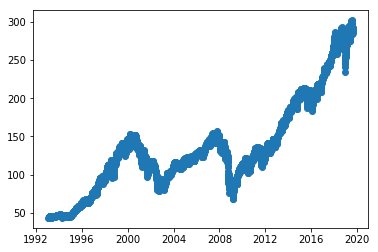

In [11]:
# Visualizing total dataset without volumne

plt.plot_date(spy['Date'], spy['Close'])

# Choose your target. Which column in your tabular dataset will you predict?


In [0]:
#  PRICE(CLOSE) NEXT DAY ABOVE/BELOW PREVIOUS DAY BASED ON ROLLING MEAN(SMA) OR RELATIVE STRENGTH (RSI)***

# Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.


In [0]:
#*WILL USE ALL SPY (S&P 500 ETF) DATA*

# Determine whether your problem is regression or classification.


In [0]:
# *CLASSIFICATION (IS THIS TICKER OVER/UNDER THE X_DAY ROLLING MEAN ***AND*** ALSO OVER/UNDER BOUGHT ON THE RSI?)*
# *AKA 3 WAY CONFUSION MATRIX WITH UNDER TO BOTH AS THE HIGHEST LIKELIHOOD PREDICTOR OF NEXT DAY/WEEKS/MONTHS POSITIVE RETURNS*

# Choose your evaluation metric.

In [0]:
# WILL USE ACCURACY SCORE

# Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.


In [0]:
from sklearn.model_selection import train_test_split
spy['Date'] = pd.to_datetime(spy['Date'])
spy['Year'] = spy['Date'].dt.year

# Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.


In [0]:
spy['SMA'] = spy.Close.rolling(window=14).mean()
spy['SMA_Yesterday'] = spy['SMA'].shift(1)

In [0]:
spy['Above_14D_SMA_Yesterday'] = np.where(spy['SMA'].shift(1)<spy['Close'].shift(1), 0,1)

In [0]:
spy['Below_14D_SMA_Yesterday'] = np.where(spy['SMA'].shift(1)>spy['Close'].shift(1), 0,1)

In [0]:
spy_numeric_diff = spy[['Close']].diff()[1:]

spy['Close_Higher_Than_Yesterday'] = np.insert(np.where(spy_numeric_diff[['Close']] >=0, '1','0'), 0, np.nan)

In [0]:
spy_2019 = spy[spy['Year'] == 2019]

In [0]:
y_train = spy_2019['Close_Higher_Than_Yesterday']

In [0]:
majority_class = y_train.mode()[0]

In [0]:
y_pred = [majority_class]*len(y_train)

In [25]:
from sklearn.metrics import accuracy_score
print('MAJORITY CLASS Validation Accuracy',accuracy_score(y_train, y_pred))

MAJORITY CLASS Validation Accuracy 0.5853658536585366


# Begin to clean and explore your data.

In [0]:
spy_2019 = spy[spy['Year'] == 2019]
spy_2018 = spy[spy['Year'] == 2018]
spy_2017 = spy[spy['Year'] == 2017]
spy_2016 = spy[spy['Year'] == 2016]
spy_2015 = spy[spy['Year'] == 2015]
spy_2014 = spy[spy['Year'] == 2014]
spy_2013 = spy[spy['Year'] == 2013]
spy_2012 = spy[spy['Year'] == 2012]
spy_2011 = spy[spy['Year'] == 2011]
spy_2010 = spy[spy['Year'] == 2010]
spy_2009 = spy[spy['Year'] == 2009]
spy_2008 = spy[spy['Year'] == 2008]
spy_2007 = spy[spy['Year'] == 2007]
spy_2006 = spy[spy['Year'] == 2006]
spy_2005 = spy[spy['Year'] == 2005]
spy_2004 = spy[spy['Year'] == 2004]
spy_2003 = spy[spy['Year'] == 2003]
spy_2002 = spy[spy['Year'] == 2002]
spy_2001 = spy[spy['Year'] == 2001]
spy_2000 = spy[spy['Year'] == 2000]
spy_1999 = spy[spy['Year'] == 1999]
spy_1998 = spy[spy['Year'] == 1998]
spy_1997 = spy[spy['Year'] == 1997]
spy_1996 = spy[spy['Year'] == 1996]
spy_1995 = spy[spy['Year'] == 1995]
spy_1994 = spy[spy['Year'] == 1994]
spy_1993 = spy[spy['Year'] == 1993]

# Plot the distribution of your target.
### Regression problem: Is your target skewed? Then, log-transform it.
### Classification: Are your classes imbalanced? Then, don't use just accuracy. And try class_balance parameter in scikit-learn.


 

In [0]:
spy_1994_2013 = pd.concat([spy_1994,spy_1995,spy_1996,spy_1997,spy_1998,
                           spy_1999,spy_2000,spy_2001,spy_2002,spy_2003,
                           spy_2004,spy_2005,spy_2006,spy_2007,spy_2008,
                           spy_2009,spy_2010,spy_2011,spy_2012,spy_2013])

In [0]:
target = ['Close_Higher_Than_Yesterday']
drop = ['Date','Year','Date_String']


train = spy_1994_2013.drop(columns=drop)
test = spy_2017.drop(columns=drop)
val = spy_2019.drop(columns=drop)

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

X_train = train.drop(columns=target)
y_train = train[target]

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [30]:
X_val.head()

,Close,Volume,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday
6528,250.179993,126925200,251.236426,252.232856,1,0
6529,244.210007,144140700,249.718570,251.236426,1,0
6530,252.389999,142628800,248.791428,249.718570,1,0
6531,254.380005,103139100,248.356428,248.791428,0,1
6532,256.769989,102512600,248.457141,248.356428,0,1


In [31]:
y_val.head()

,Close_Higher_Than_Yesterday
6528,1
6529,0
6530,1
6531,1
6532,1


In [32]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Validation Accuracy 0.5548780487804879


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_pred = pipeline.predict(X_val)

confusion_matrix(y_val, y_pred)

array([[32, 36],
       [37, 59]])

In [34]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    return columns, index

plot_confusion_matrix(y_val, y_pred)

(['Predicted 0', 'Predicted 1'], ['Actual 0', 'Actual 1'])

In [35]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return table

plot_confusion_matrix(y_val, y_pred)

,Predicted 0,Predicted 1
Actual 0,32,36
Actual 1,37,59


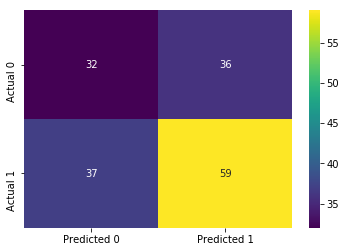

In [36]:
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.47      0.47        68
           1       0.62      0.61      0.62        96

    accuracy                           0.55       164
   macro avg       0.54      0.54      0.54       164
weighted avg       0.56      0.55      0.56       164



# Continue to clean and explore your data. Make exploratory visualizations.

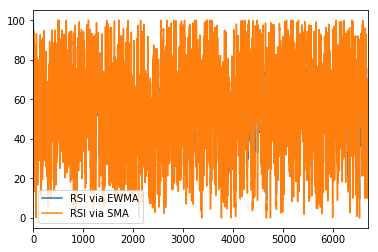

In [38]:
import pandas as pd

Close = spy['Close']

# Get the difference in price from previous step

delta = Close.diff()

# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# # Calculate the EWMA

spy['Roll_Up'] = up.shift(1)
spy['Roll_Down'] = down.abs().shift(1)

spy['Roll_Up1'] = spy['Roll_Up'].ewm(com=7).mean()
spy['Roll_Down1'] = spy['Roll_Down'].ewm(com=7).mean()

# # Calculate the RSI based on EWMA

RS1 = spy['Roll_Up1'] / spy['Roll_Down1']
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

spy['RSI_Yesterday_EXP'] = RSI1

# Calculate the SMA
spy['Roll_Up2'] = spy['Roll_Up'].rolling(window = 7).mean()
spy['Roll_Down2'] = spy['Roll_Down'].rolling(window = 7).mean()

# Calculate the RSI based on SMA
RS2 = spy['Roll_Up2'] / spy['Roll_Down2']
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

spy['RSI_Yesterday_SMA'] = RSI2

# Compare graphically
plt.figure()
RSI1.plot()
RSI2.plot()
plt.legend(['RSI via EWMA', 'RSI via SMA'])
plt.show()

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
spy['Overbought_Yesterday_EXP'] = spy['RSI_Yesterday_EXP'].shift(1) > 70.0
spy['Oversold_Yesterday_EXP'] = spy['RSI_Yesterday_EXP'].shift(1) < 30.0

spy['Overbought_Yesterday_SMA'] = spy['RSI_Yesterday_SMA'].shift(1) > 70.0
spy['Oversold_Yesterday_SMA'] = spy['RSI_Yesterday_SMA'].shift(1) < 30.0

In [0]:
spy['Overbought_Yesterday_EXP'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_Yesterday_EXP'].replace(to_replace=False,value=0, inplace=True)

spy['Overbought_Yesterday_SMA'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_Yesterday_SMA'].replace(to_replace=False,value=0, inplace=True)

In [0]:
spy['Oversold_EXP_And_Under_14D_SMA_Yesterday'] = ((spy['Oversold_Yesterday_EXP'] ==1) & (spy['Below_14D_SMA_Yesterday'] == 0))
spy['Oversold_SMA_And_Under_14D_SMA_Yesterday'] = ((spy['Oversold_Yesterday_SMA'] ==1) & (spy['Below_14D_SMA_Yesterday'] == 0))

In [0]:
spy['Oversold_EXP_And_Under_14D_SMA_Yesterday'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_SMA_And_Under_14D_SMA_Yesterday'].replace(to_replace=False,value=0, inplace=True)

In [0]:
spy['Volume_Yesterday'] = spy['Volume'].shift(1)

In [0]:
spy_2019 = spy[spy['Year'] == 2019]
spy_2018 = spy[spy['Year'] == 2018]
spy_2017 = spy[spy['Year'] == 2017]
spy_2016 = spy[spy['Year'] == 2016]
spy_2015 = spy[spy['Year'] == 2015]
spy_2014 = spy[spy['Year'] == 2014]
spy_2013 = spy[spy['Year'] == 2013]
spy_2012 = spy[spy['Year'] == 2012]
spy_2011 = spy[spy['Year'] == 2011]
spy_2010 = spy[spy['Year'] == 2010]
spy_2009 = spy[spy['Year'] == 2009]
spy_2008 = spy[spy['Year'] == 2008]
spy_2007 = spy[spy['Year'] == 2007]
spy_2006 = spy[spy['Year'] == 2006]
spy_2005 = spy[spy['Year'] == 2005]
spy_2004 = spy[spy['Year'] == 2004]
spy_2003 = spy[spy['Year'] == 2003]
spy_2002 = spy[spy['Year'] == 2002]
spy_2001 = spy[spy['Year'] == 2001]
spy_2000 = spy[spy['Year'] == 2000]
spy_1999 = spy[spy['Year'] == 1999]
spy_1998 = spy[spy['Year'] == 1998]
spy_1997 = spy[spy['Year'] == 1997]
spy_1996 = spy[spy['Year'] == 1996]
spy_1995 = spy[spy['Year'] == 1995]
spy_1994 = spy[spy['Year'] == 1994]
spy_1993 = spy[spy['Year'] == 1993]

In [0]:
spy_1994_2013 = spy[(spy['Year'] >= 1994) & (spy['Year'] <=2013)]
spy_1994_2017 = spy[(spy['Year'] >= 1994) & (spy['Year'] <=2017)]
spy_2014_2019 = spy[(spy['Year'] >=2014) & (spy['Year'] <=2019)]

In [0]:
spy_2010_2013 = pd.concat([spy_2010,spy_2011,spy_2012,spy_2013])

In [0]:
target = 'Close_Higher_Than_Yesterday'

# BELOW ARE STANDARD DROPS (SOME CONTAIN FUTURE LEAKAGE)
# drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2']

drop = ['Date','Date_String','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
        'Close','Roll_Down2','RSI_Yesterday_SMA','Overbought_Yesterday_SMA','Volume_Yesterday',
        'Oversold_EXP_And_Under_14D_SMA_Yesterday','Year','SMA_Yesterday','Below_14D_SMA_Yesterday',
        'Oversold_SMA_And_Under_14D_SMA_Yesterday','Overbought_Yesterday_EXP','Oversold_Yesterday_EXP',
        'Oversold_Yesterday_SMA','Above_14D_SMA_Yesterday']

train = spy_1994_2013.drop(columns=drop)
test = spy_2015.drop(columns=drop)
val = spy_2019.drop(columns=drop)

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

X_train = train.drop(columns=target)
y_train = train[target]

In [49]:
X_train.columns

Index(['RSI_Yesterday_EXP'], dtype='object')

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [51]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.6219512195121951


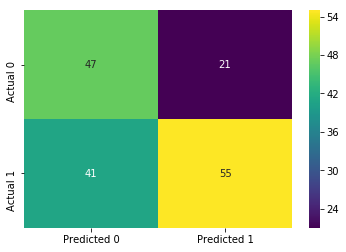

In [52]:
y_pred=pipeline.predict(X_val)

plot_confusion_matrix(y_val,y_pred)

In [53]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.69      0.60        68
           1       0.72      0.57      0.64        96

    accuracy                           0.62       164
   macro avg       0.63      0.63      0.62       164
weighted avg       0.65      0.62      0.62       164



# Fit a model. Does it beat your baseline?

### YES

In [54]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.OrdinalEncoder(), # Not ideal for Linear Regression 
    StandardScaler(), 
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 -0.008820121704945949


In [55]:
X_val_example2 = spy[spy['Date'] == '2019-05-14']
X_val_example2.drop(columns=drop)

,Close_Higher_Than_Yesterday,RSI_Yesterday_EXP
6619,1,23.557179


In [56]:
X_val_example = X_val[X_val['RSI_Yesterday_EXP'] <= 30]
X_val_example

,RSI_Yesterday_EXP
6619,23.557179
6630,29.247805
6632,25.547250
6633,24.399292
6676,28.129243
6677,16.204142


In [57]:
example = X_val_example.iloc[[0]]
example

,RSI_Yesterday_EXP
6619,23.557179


In [58]:
merged = pd.merge(spy, example, how='inner')
merged

,Date,Close,Volume,Date_String,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday,Volume_Yesterday
0,2019-05-14,283.399994,77003200,2019-05-14,2019,289.833568,290.464284,1,0,1,0.0,7.240021,0.503678,1.63443,23.557179,0.612858,2.087145,22.698426,0.0,0.0,0.0,0.0,0.0,0.0,127290500.0


In [59]:
spy.iloc[6619]

Date                                        2019-05-14 00:00:00
Close                                                     283.4
Volume                                                 77003200
Date_String                                          2019-05-14
Year                                                       2019
SMA                                                     289.834
SMA_Yesterday                                           290.464
Above_14D_SMA_Yesterday                                       1
Below_14D_SMA_Yesterday                                       0
Close_Higher_Than_Yesterday                                   1
Roll_Up                                                       0
Roll_Down                                               7.24002
Roll_Up1                                               0.503678
Roll_Down1                                              1.63443
RSI_Yesterday_EXP                                       23.5572
Roll_Up2                                

In [60]:
example1 = X_val.iloc[[9]]
example1

,RSI_Yesterday_EXP
6537,57.314309


In [61]:
prediction = pipeline.predict(example1)[0]
print(f'Predicted Probability Close Higher Today: {prediction}')

Predicted Probability Close Higher Today: 1


In [62]:
pred = lr.predict(example1)[0]
print(f'Predicted Probability Close Higher Today: {pred:.2f}')

Predicted Probability Close Higher Today: 0.54


In [63]:
example2 = X_val_example.iloc[[1]]
pred2 = lr.predict(example2)[0]
print(f'Predicted Probability Close Higher Today: {pred2:.2f}')

Predicted Probability Close Higher Today: 0.57


In [64]:
example2

,RSI_Yesterday_EXP
6630,29.247805


In [65]:
spy.dtypes

Date                                        datetime64[ns]
Close                                              float64
Volume                                               int64
Date_String                                         object
Year                                                 int64
SMA                                                float64
SMA_Yesterday                                      float64
Above_14D_SMA_Yesterday                              int64
Below_14D_SMA_Yesterday                              int64
Close_Higher_Than_Yesterday                         object
Roll_Up                                            float64
Roll_Down                                          float64
Roll_Up1                                           float64
Roll_Down1                                         float64
RSI_Yesterday_EXP                                  float64
Roll_Up2                                           float64
Roll_Down2                                         float

In [66]:
spy_date_string = spy[spy['Date_String'].str.find('2019-05-30') == 0]
spy_date_string.iloc

In [0]:
# data["Indexes"]= data["Name"].str.find(sub)

In [0]:
# [spy['Date_String'] == '2019-05-30'].iloc

In [69]:
spy.iloc[[6630]]

,Date,Close,Volume,Date_String,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday,Volume_Yesterday
6630,2019-05-30,279.029999,62523800,2019-05-30,2019,283.530001,284.075001,1,0,1,0.0,1.880005,0.600626,1.452951,29.247805,0.45714,1.53857,22.906146,0.0,0.0,0.0,1.0,0.0,1.0,104972900.0


In [70]:
example3 = X_val.iloc[[4]]
pred3 = lr.predict(example3)[0]
print(f'Predicted Probability Close Higher Today: {pred3:.2f}')

Predicted Probability Close Higher Today: 0.54


In [71]:
example3

,RSI_Yesterday_EXP
6532,54.99024


In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [0]:
# conda install -c conda-forge category_encoders
# pip install category_encoders
# pip install plotly==4.1.0
# conda install -c conda-forge eli5 

# import eli5
# from eli5.sklearn import PermutationImportance

# model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# model.fit(X_train, y_train)

# permuter = PermutationImportance(
#     model, scoring='accuracy', n_iter=2, random_state=42
# )

# permuter.fit(X_val, y_val)
# feature_names = X_val.columns.tolist()
# eli5.show_weights(
#     permuter,
#     top=None,
#     feature_names = feature_names
# )

# DO XGBOOST IN COLAB

In [0]:
# !conda install -c mndrake xgboost

In [0]:
# from sklearn.metrics import r2_score
# from xgboost import XGBRegressor

# gb = make_pipeline(
#     ce.OrdinalEncoder(), 
#     XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
# )

# gb.fit(X_train, y_train_log)
# y_pred_log = gb.predict(X_val)
# y_pred = np.expm1(y_pred_log)
# print('Gradient Boosting R^2', r2_score(y_val, y_pred))

In [0]:
# pip install pdpbox

In [0]:
# from pdpbox.pdp import pdp_isolate, pdp_plot

# feature = 'Close'

# isolated = pdp_isolate(
#     model=gb, 
#     dataset=X_val, 
#     model_features=X_val.columns, 
#     feature=feature
# )

# pdp_plot(isolated, feature_name=feature);

In [0]:
# spy.iloc[[2]].to_string()

In [0]:
# spy.iloc[[2]]

In [80]:
X_val

,RSI_Yesterday_EXP
6528,45.196316
6529,45.746490
6530,36.207737
6531,51.909942
6532,54.990240
6533,58.627558
6534,60.461062
6535,61.923501
6536,62.099565
6537,57.314309


In [81]:
spy_close_higher = spy['Close_Higher_Than_Yesterday']
spy_close_higher

0       n
1       1
2       1
3       1
4       1
5       0
6       1
7       0
8       1
9       1
10      0
11      0
12      0
13      0
14      1
15      1
16      0
17      1
18      1
19      1
20      0
21      1
22      1
23      0
24      0
25      1
26      0
27      1
28      0
29      0
30      1
31      1
32      0
33      1
34      0
35      0
36      1
37      1
38      1
39      0
40      1
41      1
42      0
43      0
44      0
45      1
46      0
47      1
48      0
49      1
50      1
51      0
52      1
53      1
54      0
55      0
56      0
57      0
58      0
59      0
60      1
61      0
62      1
63      1
64      1
65      1
66      1
67      0
68      0
69      1
70      1
71      0
72      0
73      0
74      1
75      0
76      1
77      1
78      0
79      1
80      1
81      1
82      0
83      0
84      1
85      0
86      0
87      0
88      0
89      0
90      1
91      1
92      1
93      0
94      0
95      1
96      1
97      0
98      1
99      1


In [82]:
y_pred=pipeline.predict(X_val)
y_pred

array(['1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0',
       '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1',
       '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1',
       '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0',
       '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1',
       '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0',
       '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '0', '0', '0', '0', '1'], dtype=object)

In [83]:
s = pd.Series(y_pred) 
s

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      1
8      0
9      1
10     0
11     0
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     1
24     0
25     0
26     1
27     1
28     0
29     1
30     1
31     0
32     1
33     1
34     0
35     0
36     1
37     0
38     0
39     0
40     1
41     1
42     0
43     0
44     0
45     0
46     1
47     0
48     0
49     0
50     0
51     1
52     1
53     0
54     1
55     1
56     0
57     1
58     0
59     1
60     0
61     1
62     1
63     1
64     1
65     0
66     0
67     0
68     0
69     1
70     0
71     0
72     1
73     0
74     0
75     1
76     0
77     0
78     0
79     0
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     1
91     0
92     1
93     0
94     0
95     0
96     0
97     0
98     1
99     1
100    0
101    1
102    0
103    0
104    0
105    1
106    1
107    1
108    1
109    1
110    0
1

In [84]:
preds = s.to_frame(name='Predictions')
preds

,Predictions
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,1


In [85]:
actual_and_preds = pd.concat([spy_close_higher,preds], axis=1)
actual_and_preds.head()

,Close_Higher_Than_Yesterday,Predictions
0,n,1
1,1,0
2,1,1
3,1,1
4,1,1


In [86]:
actual_and_preds.shape

(6692, 2)

In [0]:
# actual_and_preds.

In [88]:
actual_and_preds

,Close_Higher_Than_Yesterday,Predictions
0,n,1
1,1,0
2,1,1
3,1,1
4,1,1
5,0,1
6,1,1
7,0,1
8,1,0
9,1,1


In [0]:
actual_and_preds = actual_and_preds.drop(actual_and_preds.index[0])

In [90]:
actual_and_preds

,Close_Higher_Than_Yesterday,Predictions
1,1,0
2,1,1
3,1,1
4,1,1
5,0,1
6,1,1
7,0,1
8,1,0
9,1,1
10,0,0


In [0]:
actual_and_preds['Close_Higher_Than_Yesterday'] = (actual_and_preds['Close_Higher_Than_Yesterday']).astype(int)

In [0]:
actual_and_preds.dropna(axis=0, inplace=True)

In [0]:
actual_and_preds['Predictions'] = (actual_and_preds['Predictions']).astype(int)

In [94]:
actual_and_preds.tail()

,Close_Higher_Than_Yesterday,Predictions
159,0,0
160,0,0
161,0,0
162,0,0
163,1,1


In [0]:
actual_and_preds['pred_yes_was_yes'] = (
    (actual_and_preds['Close_Higher_Than_Yesterday']==1) & (actual_and_preds['Predictions']==1)
)

actual_and_preds['pred_yes_was_no'] = (
    (actual_and_preds['Predictions'] ==1) & (actual_and_preds['Close_Higher_Than_Yesterday']==0)
)

actual_and_preds['pred_no_was_yes'] = (
    (actual_and_preds['Close_Higher_Than_Yesterday']==1) & (actual_and_preds['Predictions']==0)
)

actual_and_preds['pred_no_was_no'] = (
    (actual_and_preds['Predictions'] ==0) & (actual_and_preds['Close_Higher_Than_Yesterday']==0)
)

In [96]:
actual_and_preds.shape

(163, 6)

In [0]:
actual_and_preds['pred_yes_was_yes'] = np.where(actual_and_preds['pred_yes_was_yes']==True, 1,0)
actual_and_preds['pred_yes_was_no'] = np.where(actual_and_preds['pred_yes_was_no']==True, 1,0)
actual_and_preds['pred_no_was_yes'] = np.where(actual_and_preds['pred_no_was_yes']==True, 1,0)
actual_and_preds['pred_no_was_no'] = np.where(actual_and_preds['pred_no_was_no']==True, 1,0)

In [98]:
actual_and_preds

,Close_Higher_Than_Yesterday,Predictions,pred_yes_was_yes,pred_yes_was_no,pred_no_was_yes,pred_no_was_no
1,1,0,0,0,1,0
2,1,1,1,0,0,0
3,1,1,1,0,0,0
4,1,1,1,0,0,0
5,0,1,0,1,0,0
6,1,1,1,0,0,0
7,0,1,0,1,0,0
8,1,0,0,0,1,0
9,1,1,1,0,0,0
10,0,0,0,0,0,1
